# <font color='Blue'>Logistic Regression.</font>

------------------------------------------------------------------------------------------------------------------------------------------------------

## <font color='Blue'>Understanding Data.</font>

In [3]:
import pandas as pd

file_path = "C:\\Users\\roari\\Downloads\\Logistic regression\\breast_cancer_dataset.xlsx"
df = pd.read_excel(file_path)


In [5]:
print("Size of the dataset:", df.size)
print("Shape of the dataset:", df.shape)
print("Info of the dataset:")
print(df.info())


Size of the dataset: 17639
Shape of the dataset: (569, 31)
Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  

In [11]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

C:\Users\roari\AppData\Local\Temp\ipykernel_44224\2237049822.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set1')


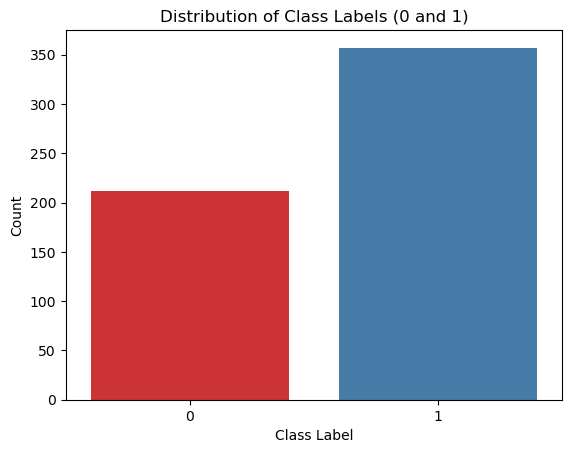

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot to visualize the distribution of class labels
sns.countplot(x='target', data=df, palette='Set1')

# Set plot labels and title
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Class Labels (0 and 1)')

# Show the plot
plt.show()


In [9]:
# Count the number of occurrences of each class label
class_counts = df['target'].value_counts()

# Display the counts
print(class_counts)


target
1    357
0    212
Name: count, dtype: int64


------------------------------------------------------------------------------------------------------------------------------------------------------

## <font color='Blue'>Model 1 - Comparing above 2 with and without L2 regularization.</font>

C:\Users\roari\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


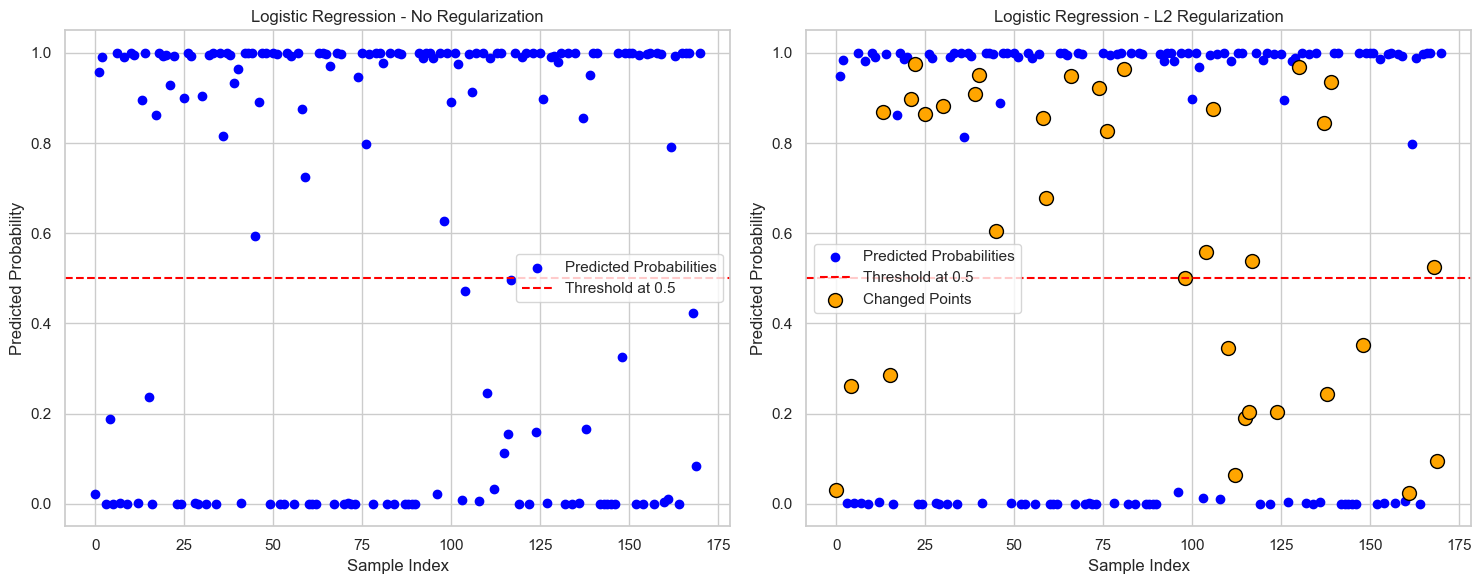

Training Accuracy (No Regularization): 0.99
Testing Accuracy (No Regularization): 0.96

Classification Report (No Regularization):
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        64
           1       0.98      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Training Accuracy (L2 Regularization): 0.99
Testing Accuracy (L2 Regularization): 0.98

Classification Report (L2 Regularization):
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load the data
file_path = Path('C:/Users/roari/Downloads/Logistic regression/breast_cancer_dataset.xlsx')
data = pd.read_excel(file_path)  # Use read_excel since it's an .xlsx file

# Define features (X) and target (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Build logistic regression model without regularization
logreg_no_reg = LogisticRegression(penalty=None, solver='saga', random_state=42)
logreg_no_reg.fit(X_train, y_train)
y_pred_proba_no_reg = logreg_no_reg.predict_proba(X_test)[:, 1]

# Build logistic regression model with L2 regularization
logreg_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
logreg_l2.fit(X_train, y_train)
y_pred_proba_l2 = logreg_l2.predict_proba(X_test)[:, 1]

# Plotting the predicted probabilities side by side
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot for logistic regression without regularization
ax[0].scatter(range(len(y_pred_proba_no_reg)), y_pred_proba_no_reg, color='blue', marker='o', label='Predicted Probabilities')
ax[0].set_xlabel('Sample Index')
ax[0].set_ylabel('Predicted Probability')
ax[0].set_title('Logistic Regression - No Regularization')
ax[0].axhline(y=0.5, color='red', linestyle='--', label='Threshold at 0.5')
ax[0].legend()

# Plot for logistic regression with L2 regularization
ax[1].scatter(range(len(y_pred_proba_l2)), y_pred_proba_l2, color='blue', marker='o', label='Predicted Probabilities')
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Predicted Probability')
ax[1].set_title('Logistic Regression - L2 Regularization')
ax[1].axhline(y=0.5, color='red', linestyle='--', label='Threshold at 0.5')

# Highlight the points that change position after L2 regularization
changed_indices = np.abs(y_pred_proba_l2 - y_pred_proba_no_reg) > 0.01  # Threshold to identify significant changes
ax[1].scatter(np.where(changed_indices)[0], y_pred_proba_l2[changed_indices], color='orange', edgecolor='black', s=100, label='Changed Points')

ax[1].legend()

plt.tight_layout()
plt.show()

# Output the results
print("Training Accuracy (No Regularization): {:.2f}".format(logreg_no_reg.score(X_train, y_train)))
print("Testing Accuracy (No Regularization): {:.2f}".format(accuracy_score(y_test, logreg_no_reg.predict(X_test))))
print("\nClassification Report (No Regularization):\n", classification_report(y_test, logreg_no_reg.predict(X_test)))

print("Training Accuracy (L2 Regularization): {:.2f}".format(logreg_l2.score(X_train, y_train)))
print("Testing Accuracy (L2 Regularization): {:.2f}".format(accuracy_score(y_test, logreg_l2.predict(X_test))))
print("\nClassification Report (L2 Regularization):\n", classification_report(y_test, logreg_l2.predict(X_test)))


------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------

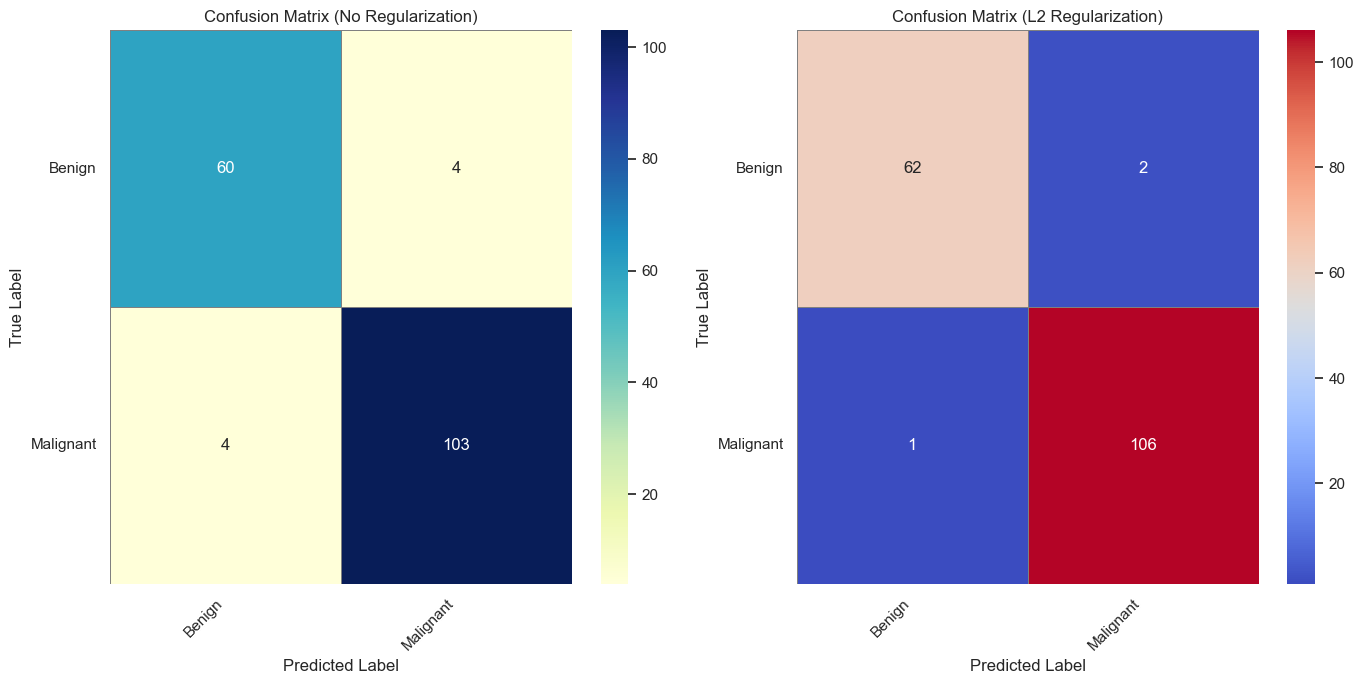

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the confusion matrices
conf_matrix_no_reg = np.array([[60, 4], [4, 103]])
conf_matrix_l2 = np.array([[62, 2], [1, 106]])

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot heatmap for confusion matrix without regularization
sns.heatmap(conf_matrix_no_reg, annot=True, fmt='d', cmap='YlGnBu', cbar=True,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'],
            ax=axes[0], linewidths=0.5, linecolor='gray')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Confusion Matrix (No Regularization)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

# Plot heatmap for confusion matrix with L2 regularization
sns.heatmap(conf_matrix_l2, annot=True, fmt='d', cmap='coolwarm', cbar=True,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'],
            ax=axes[1], linewidths=0.5, linecolor='gray')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix (L2 Regularization)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()


-------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------------

## <font color='Blue'>Model 2 - Logistic Regression with k fold cross validation , L2 regularization and hyperparameter tunning.</font>

In [1]:
import pandas as pd

# Define the file path
file_path = "C:\\Users\\roari\\Downloads\\Logistic regression\\breast_cancer_dataset.xlsx"

# Load the data into a DataFrame
df = pd.read_excel(file_path)

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [15]:
df.shape

(569, 31)

--------------------------------------------------------------------------------------------------------------------------------------------------------

Cross-Validation Mean Accuracy: 0.9802
Training Accuracy: 0.9868
Testing Accuracy: 0.9737
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[40  2]
 [ 1 71]]


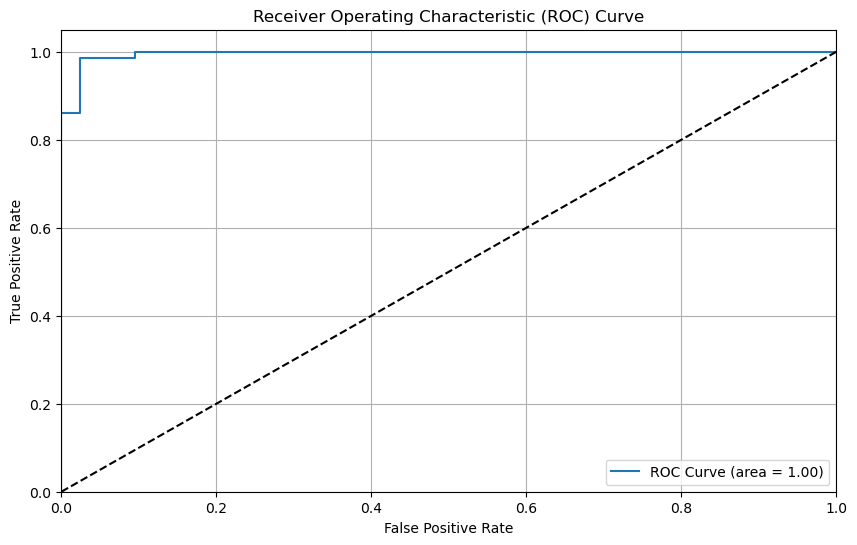

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the data
file_path = "C:\\Users\\roari\\Downloads\\Logistic regression\\breast_cancer_dataset.xlsx"
df = pd.read_excel(file_path)

# Separate features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up Logistic Regression with L2 regularization
log_reg = LogisticRegression(penalty='l2')

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(log_reg, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

# Best model from grid search
best_model = grid.best_estimator_

# Evaluate the model using K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
for train_index, test_index in kf.split(X_train_scaled):
    X_cv_train, X_cv_test = X_train_scaled[train_index], X_train_scaled[test_index]
    y_cv_train, y_cv_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    best_model.fit(X_cv_train, y_cv_train)
    cv_scores.append(best_model.score(X_cv_test, y_cv_test))

print(f'Cross-Validation Mean Accuracy: {np.mean(cv_scores):.4f}')

# Fit the model on the full training data
best_model.fit(X_train_scaled, y_train)

# Calculate accuracy for training and testing data
train_accuracy = best_model.score(X_train_scaled, y_train)
test_accuracy = best_model.score(X_test_scaled, y_test)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')

# Predictions and metrics
y_pred = best_model.predict(X_test_scaled)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## <font color='Blue'>Model 3 - Logistic Regression with k fold cross validation , "Without L2 regularization" and hyperparameter tunning.</font>

Training Accuracy: 0.9890
Testing Accuracy: 0.9825
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[41  1]
 [ 1 71]]


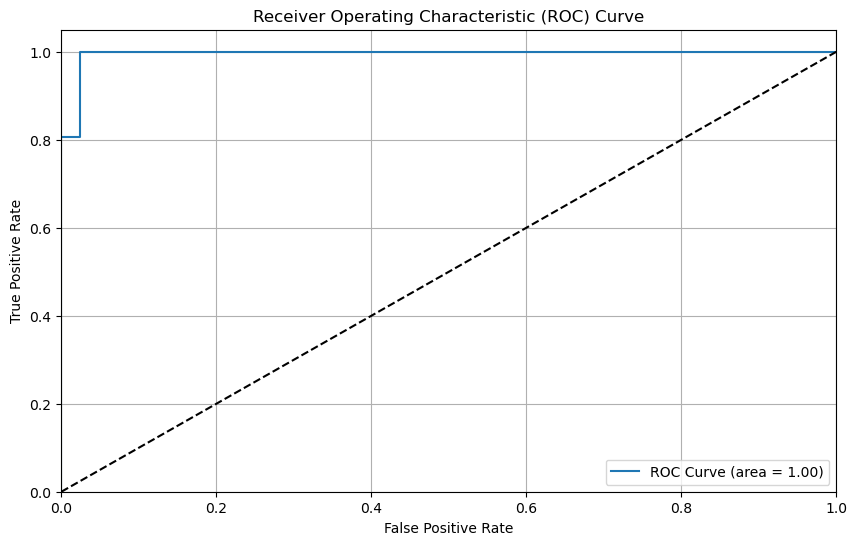

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the data
file_path = "C:\\Users\\roari\\Downloads\\Logistic regression\\breast_cancer_dataset.xlsx"
df = pd.read_excel(file_path)

# Separate features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up Logistic Regression without L2 regularization (no hyperparameter tuning)
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train_scaled, y_train)

# Calculate accuracy for training and testing data
train_accuracy = log_reg.score(X_train_scaled, y_train)
test_accuracy = log_reg.score(X_test_scaled, y_test)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')

# Predictions and metrics
y_pred = log_reg.predict(X_test_scaled)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
